In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sn
import numpy as np

In [71]:
#import first file as df then convert to numpy array
data1 = pd.read_csv("run1groupD.txt", sep = '\t')
data1 = data1.drop('Unnamed: 4', axis = 1)
data1 = data1.apply(pd.to_numeric)
data1 = data1.to_numpy()
l = [data1]

In [72]:
#import the rest of the files
for i in range(2, 17):
    docString = "run" + str(i) + "groupD.txt"
    dataTemp = pd.read_csv(docString, sep = '\t')
    dataTemp = dataTemp.drop('Unnamed: 4', axis = 1)
    dataTemp = dataTemp.apply(pd.to_numeric)
    dataTemp = dataTemp.to_numpy()
    l.append(dataTemp)

In [73]:
#trim the arrays so that the average of the center and edge are less than 30 or greater than 70
for i in range(0,16):
    tempAr = l[i]
    tempAr = tempAr[np.logical_and((tempAr[:,1]+tempAr[:,2])/2 >= 30, (tempAr[:,1]+tempAr[:,2])/2 <= 70)]
    l[i] = tempAr

In [74]:
def getData(l, i, tSteam):
    dataTemp = l[i]
    time = dataTemp[:,0]
    time = time - time[0]
    tem = (dataTemp[:,1] + dataTemp[:,2])/2
    thetaI = tSteam-tem[0]
    thetaT = tSteam-tem
    return(time, np.log(thetaI/thetaT))

In [75]:
#fit a linear curve for each run for average temp vs time
Dt = np.array([])
DTheta = np.array([])
tSteam = 107

for i in range(0,16):
    time, theta = getData(l, i, tSteam)
    Dt = np.append(Dt,time[-1])
    DTheta = np.append(DTheta,theta[-1])

In [76]:
m = 59.2 #kg of water in vessel
cp = 4181.5 #cp at 1 atm, 50 degree C
As = 0.5868 #surface area of inside
u = DTheta*m*cp/(As*Dt)

print('average U for 250 rpm', sum([u[0],u[4],u[8],u[12]])/4)
print('average U for 500 rpm', sum([u[1],u[5],u[9],u[13]])/4)
print('average U for 750 rpm', sum([u[2],u[6],u[10],u[14]])/4)
print('average U for 1000 rpm', sum([u[3],u[7],u[11],u[14]])/4)

average U for 250 rpm 1046.1743771640529
average U for 500 rpm 1065.3999926117638
average U for 750 rpm 1066.6530029648286
average U for 1000 rpm 1062.6730476718562


In [79]:
1065/1046

1.0181644359464628

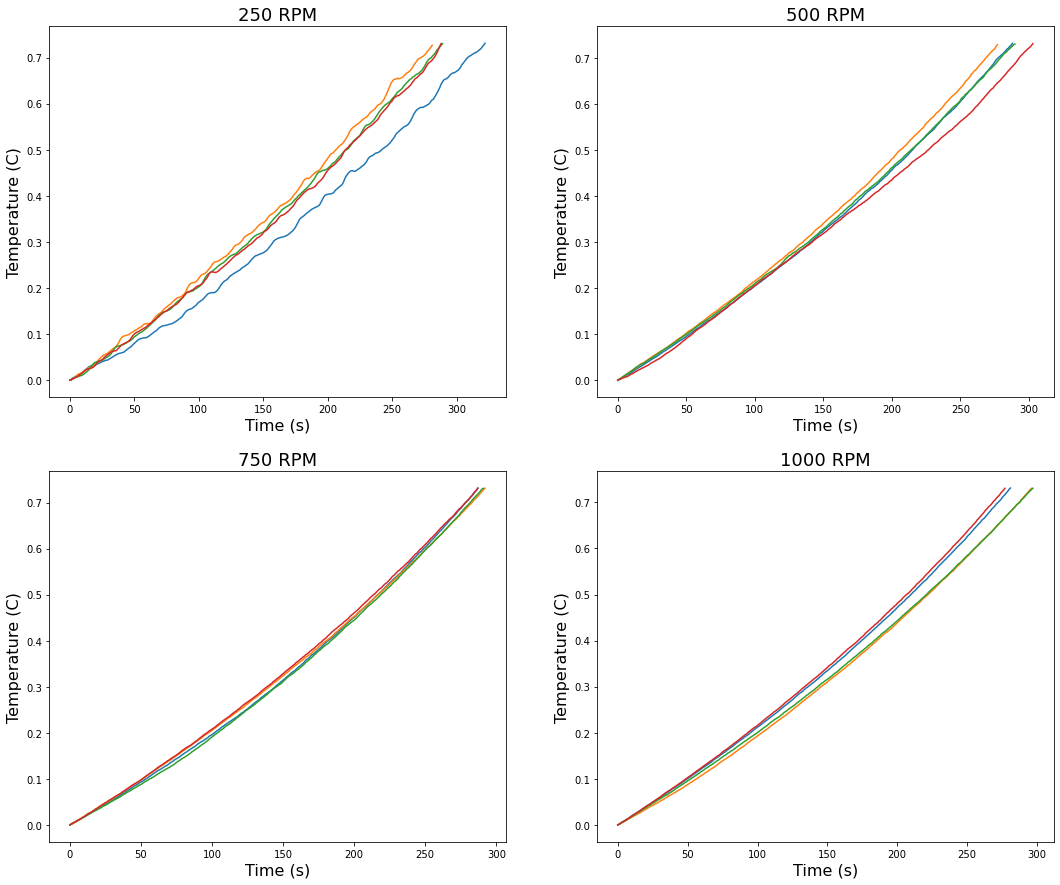

In [11]:
fig, axs = plt.subplots(2,2, figsize=(18,15))
tSteam = 107 #engineering toolbox, boiling point at 19 psia

for i in range(0,16):
    timeTemp, temTemp = getData(l, i, tSteam)
    if (i % 4 == 0):
        axs[0,0].plot(timeTemp, temTemp)
    elif (i % 4 == 1):
        axs[0,1].plot(timeTemp, temTemp)
    elif (i % 4 == 2):
        axs[1,0].plot(timeTemp, temTemp)
    else:
        axs[1,1].plot(timeTemp, temTemp)

axs[0,0].set_title('250 RPM', fontsize = 18)
axs[0,1].set_title('500 RPM', fontsize = 18)
axs[1,0].set_title('750 RPM', fontsize = 18)
axs[1,1].set_title('1000 RPM', fontsize = 18)

for i in range(0,2):
    for j in range(0,2):
        axs[i,j].set_xlabel('Time (s)', fontsize = 16)
        axs[i,j].set_ylabel('Temperature (C)', fontsize = 16)
plt.show()

In [80]:
ds1 = np.loadtxt('run1SugGroupD.txt', skiprows = 1)
ds1 = ds1[0:1000,:]
s = [ds1]

for i in range (2,9):
    docString = "run" + str(i) + "SugGroupD.txt"
    ds = np.loadtxt(docString, skiprows = 1)
    s.append(ds)

In [81]:
for i in range(0,8):
    tempAr = s[i]
    tempAr = tempAr[np.logical_and((tempAr[:,1]+tempAr[:,2])/2 >= 30, (tempAr[:,1]+tempAr[:,2])/2 <= 70)]
    s[i] = tempAr

In [82]:
Dtsug = np.array([])
DThetasug = np.array([])
tSteam = 107

for i in range(0,8):
    time, theta = getData(s, i, tSteam)
    Dtsug = np.append(Dtsug,time[-1])
    DThetasug = np.append(DThetasug,theta[-1])

In [83]:
specificGrav = np.array([1.02, 1.035, 1.02, 1.083, 1.04, 1.02, 1.061, 1.04])
m = 59.2 #kg of water in vessel
cp = np.array([4080.0, 3990.0, 4080.0, 3760.0, 3970.0, 4080.0, 3870.0, 3970.0]) #cp at 1 atm, 50 degree C
As = 0.5868 #surface area of inside
usug = DThetasug*m*specificGrav*cp/(As*Dtsug)
usug

array([1044.73149132, 1098.58196104, 1089.9262536 , 1066.65690317,
       1081.40371447, 1046.95835972,  944.31527235,  912.9597695 ])

In [104]:
con = np.array([0.05, 0.09, 0.05, 0.2, 0.1, 0.05, 0.15, 0.1])
con = con*100
con = sm.add_constant(con)
model = sm.OLS(usug, con)
results = model.fit()
results.params

array([1064.34336757,   -2.90143311])

Text(0, 0.5, 'Overall heat transfer coefficent W/m^K')

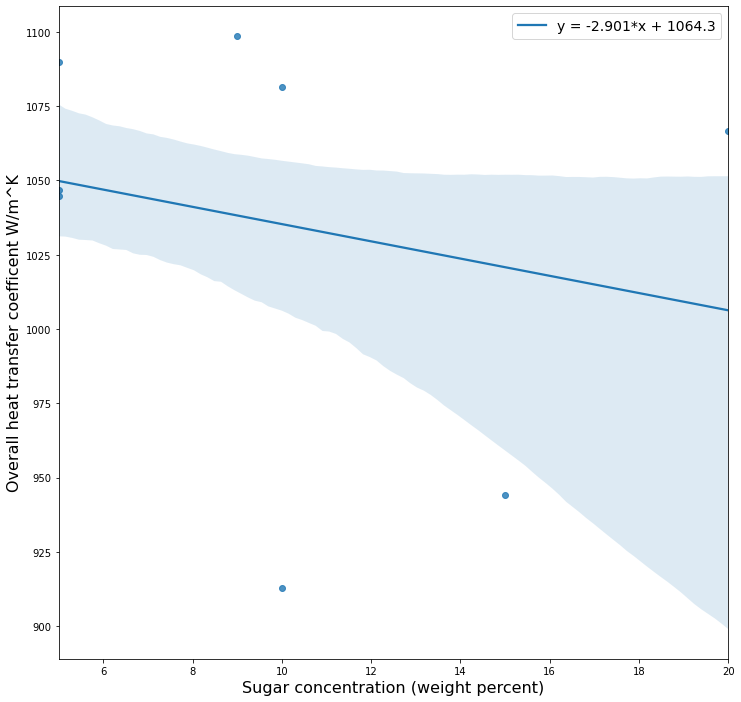

In [114]:
con = np.array([0.05, 0.09, 0.05, 0.2, 0.1, 0.05, 0.15, 0.1])
con = con*100
plt.figure(figsize = (12,12))
sn.regplot(x = con, y = usug, ci = 68)

plt.legend(labels=['y = -2.901*x + 1064.3'], fontsize = 14)
plt.xlabel('Sugar concentration (weight percent)', fontsize = 16)
plt.ylabel('Overall heat transfer coefficent W/m^K', fontsize = 16)

In [10]:
ite = np.array([12016,
12225,
13009,
12079,
13096,
12026,
13281,
14200,
14279,
18438])

ti = np.array([4.147,
2.114,
1.538,
1.207,
0.850,
0.613,
0.491,
0.41,
0.395,
0.523])

ite/core/ti

array([2897.51627683, 2891.43803217, 2819.46250542, 2501.86412593,
       2567.84313725, 2452.28384992, 2254.07331976, 2164.63414634,
       1807.46835443, 1468.9292543 ])

In [11]:
5.9/0.491

12.016293279022404

In [13]:
9.11/0.613

14.861337683523654